## IMPORTING LIBRARYS

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.datasets import fetch_california_housing 
from mpl_toolkits.basemap import Basemap
import plotly.express as px
from xgboost import XGBRegressor

## GETTING DATA

In [2]:
pure_data= fetch_california_housing()  
df=pd.DataFrame(data=pure_data.data,columns=pure_data.feature_names) 
df['MedHouseVal']=pure_data.target 
df=df.sample(frac=1) 
df 
X=df.drop(columns=['MedHouseVal'],axis=1)
y=df['MedHouseVal'] 
df 

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
18132,5.7881,28.0,6.068293,0.965854,1190.0,2.902439,37.34,-122.02,3.447
17144,5.1032,18.0,3.726651,0.943052,853.0,1.943052,37.45,-122.19,4.646
12975,2.5909,17.0,4.871479,1.028169,1275.0,2.244718,38.66,-121.33,1.254
15502,6.3373,7.0,6.927083,1.113281,2015.0,2.623698,33.09,-117.23,2.796
20228,2.3147,38.0,3.221323,1.009447,1537.0,2.074224,34.28,-119.29,1.925
...,...,...,...,...,...,...,...,...,...
13790,3.4695,6.0,6.402402,1.124625,2005.0,3.010511,34.42,-117.56,1.388
2276,3.3200,27.0,5.483296,1.077951,852.0,1.897550,36.80,-119.79,1.247
6221,5.1840,35.0,6.041754,0.974948,1420.0,2.964509,34.06,-117.92,2.249
1942,4.5568,12.0,6.304843,1.094017,1097.0,3.125356,38.65,-120.93,1.701


In [3]:
X

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
18132,5.7881,28.0,6.068293,0.965854,1190.0,2.902439,37.34,-122.02
17144,5.1032,18.0,3.726651,0.943052,853.0,1.943052,37.45,-122.19
12975,2.5909,17.0,4.871479,1.028169,1275.0,2.244718,38.66,-121.33
15502,6.3373,7.0,6.927083,1.113281,2015.0,2.623698,33.09,-117.23
20228,2.3147,38.0,3.221323,1.009447,1537.0,2.074224,34.28,-119.29
...,...,...,...,...,...,...,...,...
13790,3.4695,6.0,6.402402,1.124625,2005.0,3.010511,34.42,-117.56
2276,3.3200,27.0,5.483296,1.077951,852.0,1.897550,36.80,-119.79
6221,5.1840,35.0,6.041754,0.974948,1420.0,2.964509,34.06,-117.92
1942,4.5568,12.0,6.304843,1.094017,1097.0,3.125356,38.65,-120.93


In [4]:
y

18132    3.447
17144    4.646
12975    1.254
15502    2.796
20228    1.925
         ...  
13790    1.388
2276     1.247
6221     2.249
1942     1.701
8889     3.833
Name: MedHouseVal, Length: 20640, dtype: float64

In [5]:
df = pd.concat([X,y],axis=1)
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
18132,5.7881,28.0,6.068293,0.965854,1190.0,2.902439,37.34,-122.02,3.447
17144,5.1032,18.0,3.726651,0.943052,853.0,1.943052,37.45,-122.19,4.646
12975,2.5909,17.0,4.871479,1.028169,1275.0,2.244718,38.66,-121.33,1.254
15502,6.3373,7.0,6.927083,1.113281,2015.0,2.623698,33.09,-117.23,2.796
20228,2.3147,38.0,3.221323,1.009447,1537.0,2.074224,34.28,-119.29,1.925
...,...,...,...,...,...,...,...,...,...
13790,3.4695,6.0,6.402402,1.124625,2005.0,3.010511,34.42,-117.56,1.388
2276,3.3200,27.0,5.483296,1.077951,852.0,1.897550,36.80,-119.79,1.247
6221,5.1840,35.0,6.041754,0.974948,1420.0,2.964509,34.06,-117.92,2.249
1942,4.5568,12.0,6.304843,1.094017,1097.0,3.125356,38.65,-120.93,1.701


## VISUALIZING DATA

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20640 entries, 18132 to 8889
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.6 MB


In [7]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
18132,5.7881,28.0,6.068293,0.965854,1190.0,2.902439,37.34,-122.02,3.447
17144,5.1032,18.0,3.726651,0.943052,853.0,1.943052,37.45,-122.19,4.646
12975,2.5909,17.0,4.871479,1.028169,1275.0,2.244718,38.66,-121.33,1.254
15502,6.3373,7.0,6.927083,1.113281,2015.0,2.623698,33.09,-117.23,2.796
20228,2.3147,38.0,3.221323,1.009447,1537.0,2.074224,34.28,-119.29,1.925


In [8]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [9]:
df.corr()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
MedHouseVal,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


### distribution of target values

/tmp/ipykernel_72854/3098026193.py:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  fig=sns.displot(y,palette='pastel')


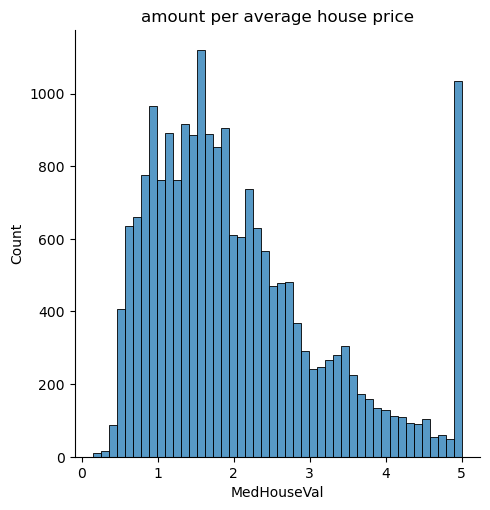

In [10]:
fig=sns.displot(y,palette='pastel') 
plt.title('amount per average house price')  
plt.savefig('./images/distribution-calhousing.png')
plt.show() 

### showing heat map of correlation matrix 

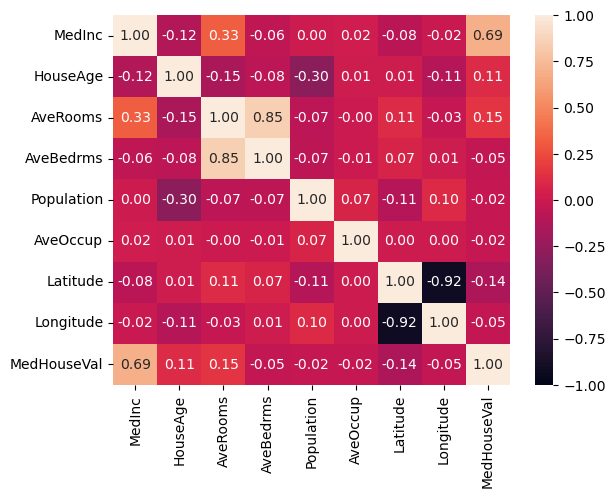

In [11]:
sns.heatmap(data=df.corr(),annot=True, fmt=".2f",mask=None,vmin=-1.0, vmax=1.0)  
plt.savefig('./images/correlation-heat-map.png')
plt.show()

### showing average house price per region

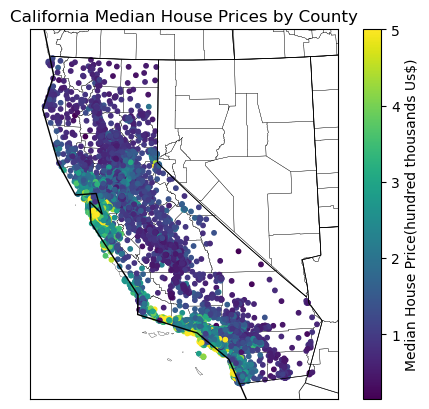

In [12]:
m = Basemap(
    projection='lcc',
    resolution='c',
    lat_0=37.5, lon_0=-119,
    width=1E6, height=1.2E6
)

m.drawcoastlines()
m.drawcountries()
m.drawstates()
m.drawcounties(linewidth=0.2) 

m.scatter(df['Longitude'], df['Latitude'], latlon=True, c=df['MedHouseVal'], cmap='viridis', marker='o', s=10)

plt.colorbar(label='Median House Price(hundred thousands Us$)')

plt.title('California Median House Prices by County')
plt.savefig('./images/medianhouseval-geomap.png')
plt.show()

#### interactive

### reducing dimensions to see scatterplot with tsne

In [13]:
from sklearn.manifold import TSNE
df_tsne_sample=df.sample(frac=0.2) 
X_tsne_sample=df_tsne_sample.drop(columns=['MedHouseVal']) 
y_tsne_sample=df_tsne_sample['MedHouseVal']
tsne=TSNE(n_components=1,random_state=200)  #we apply the random state so that its not different everytime we restar 
array_red=tsne.fit_transform(X_tsne_sample) #applying dimensional reductioon on array  
df_tsne=pd.DataFrame(array_red,columns=['COMP1']) # making it into a pandas dataframe for easier viewing 
df_tsne = df_tsne.reset_index(drop=True)
y_tsne_sample = y_tsne_sample.reset_index(drop=True)
df_tsne

,COMP1
0,-20.654797
1,37.476673
2,-68.449402
3,31.049292
4,-83.698341
...,...
4123,-12.454295
4124,-46.440235
4125,-37.573788
4126,78.244370


In [14]:
df_tsne['target']=y_tsne_sample
df_tsne

,COMP1,target
0,-20.654797,2.40300
1,37.476673,1.21800
2,-68.449402,4.14700
3,31.049292,5.00001
4,-83.698341,0.87500
...,...,...
4123,-12.454295,0.80600
4124,-46.440235,1.60700
4125,-37.573788,0.85400
4126,78.244370,2.39100


In [15]:
array_red

array([[-20.654797],
       [ 37.476673],
       [-68.4494  ],
       ...,
       [-37.573788],
       [ 78.24437 ],
       [-20.297886]], dtype=float32)

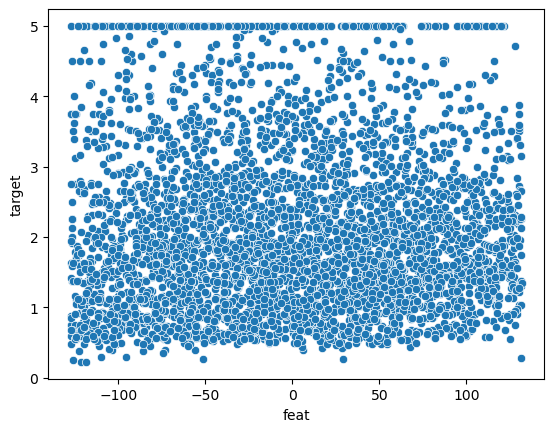

In [16]:
sns.scatterplot(data=df_tsne,x='COMP1',y='target') 
plt.xlabel("feat") 
plt.ylabel("target") 
plt.savefig('./images/dimension-reduciton-tsne.png')
plt.show() 

### using dimensiality reduction with PCA

In [17]:
from sklearn.decomposition import PCA   
df_pca_sample=df.sample(frac=0.2) 
X_pca_sample=df_pca_sample.drop(columns=['MedHouseVal']) 
y_pca_sample=df_pca_sample['MedHouseVal']
pca=PCA(n_components=1) 
arrayFeat=pca.fit_transform(X_pca_sample) 
df_pca=pd.DataFrame(arrayFeat,columns=['COMP1']) # making it into a pandas dataframe for easier viewing 
df_pca = df_pca.reset_index(drop=True)
y_pca_sample = y_pca_sample.reset_index(drop=True)
df_pca 

,COMP1
0,-534.594990
1,69.463223
2,-398.579511
3,-946.614859
4,2891.461928
...,...
4123,-301.588836
4124,-122.576330
4125,-1106.615829
4126,9.378400


In [18]:
df_pca['target']=y_pca_sample 
df_pca

,COMP1,target
0,-534.594990,4.00000
1,69.463223,0.82500
2,-398.579511,2.03400
3,-946.614859,2.23200
4,2891.461928,2.51900
...,...,...
4123,-301.588836,1.76700
4124,-122.576330,2.53100
4125,-1106.615829,5.00001
4126,9.378400,1.46000


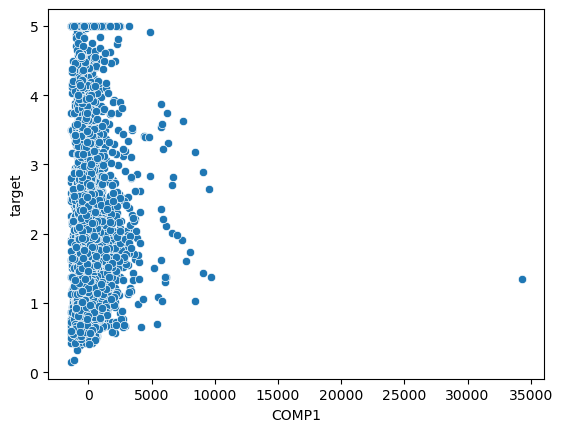

In [19]:
sns.scatterplot(data=df_pca,x='COMP1',y='target')
plt.savefig('./images/dimension-reduciton-pca.png')
plt.show()

## SPLITTING DATA

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=32)

In [21]:
X_train

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
20280,3.2212,35.0,4.786372,1.016575,2726.0,5.020258,34.19,-119.19
12389,3.7727,24.0,10.953586,1.848101,473.0,1.995781,33.75,-116.43
16732,4.1875,15.0,6.535471,1.079689,3139.0,3.050534,35.41,-120.65
9581,2.3099,13.0,4.525751,1.023605,1108.0,2.377682,37.32,-120.51
10111,5.1084,25.0,6.487026,1.089820,1452.0,2.898204,33.94,-117.94
...,...,...,...,...,...,...,...,...
19866,4.5938,18.0,6.153664,1.130024,1158.0,2.737589,36.33,-119.32
583,5.6194,32.0,6.746594,1.002725,1048.0,2.855586,37.72,-122.08
1289,3.1728,17.0,6.524272,1.317152,1749.0,2.830097,38.01,-121.79
10411,6.2464,4.0,6.461856,1.039175,1599.0,3.296907,33.65,-117.60


In [22]:
y_train

20280    1.80500
12389    5.00001
16732    2.61600
9581     0.89600
10111    3.03800
          ...   
19866    1.50500
583      2.74700
1289     1.46800
10411    2.33900
19215    1.88800
Name: MedHouseVal, Length: 16512, dtype: float64

In [23]:
X_test

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
19982,1.4792,22.0,4.153117,0.983740,2165.0,2.933604,36.21,-119.34
15798,3.8261,52.0,4.808511,1.072948,868.0,2.638298,37.76,-122.43
20245,3.7337,36.0,4.798054,0.929440,1029.0,2.503650,34.27,-119.26
6302,2.6250,21.0,4.801205,0.975904,484.0,2.915663,34.03,-117.98
9183,5.8602,8.0,5.563588,1.040897,9936.0,2.621636,34.41,-118.55
...,...,...,...,...,...,...,...,...
7863,2.9375,35.0,5.167905,1.084695,1885.0,2.800892,33.90,-118.12
2181,3.6204,18.0,6.182609,1.056522,702.0,3.052174,36.77,-119.92
11868,3.6477,15.0,8.334951,1.631068,501.0,2.432039,40.30,-121.09
14481,9.5245,23.0,7.607187,1.023544,2036.0,2.522924,32.82,-117.25


In [24]:
y_test

19982    0.54400
15798    2.50000
20245    2.09000
6302     1.91100
9183     2.65100
          ...   
7863     2.06500
2181     1.19800
11868    1.13400
14481    5.00001
19463    1.49600
Name: MedHouseVal, Length: 4128, dtype: float64

## CREATING MODEL 

In [25]:
from sklearn.linear_model import LinearRegression  
from sklearn.tree import DecisionTreeRegressor


In [26]:
# model=DecisionTreeRegressor() 

In [27]:
from sklearn.ensemble import RandomForestRegressor 
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import cross_val_score,cross_val_predict,train_test_split 
from sklearn.datasets import load_diabetes 
from sklearn.decomposition import PCA  
from sklearn.tree import  DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor 
from sklearn.linear_model import SGDRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler 
from sklearn.neighbors import KNeighborsRegressor 
from sklearn.neighbors import RadiusNeighborsRegressor 
from sklearn.cross_decomposition import PLSCanonical,PLSRegression
from sklearn.ensemble import ExtraTreesRegressor 
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import VotingRegressor 
def getModels(): 
   return {"LINEAR REGRESSION":LinearRegression(), 
    "RANDOM FOREST":RandomForestRegressor(max_depth=9,min_samples_leaf=4,min_samples_split=8,n_estimators=200),
    "ADA BOOST":AdaBoostRegressor(learning_rate= 0.1, loss= 'exponential', n_estimators= 50), 
    "DECISION TREE":DecisionTreeRegressor(), 
    "SGD":make_pipeline(StandardScaler(),SGDRegressor(alpha= 0.01,eta0= 0.1,learning_rate= 'optimal',loss= 'epsilon_insensitive',max_iter= 100,penalty= 'l1',tol= 0.01)), 
    "KNN":KNeighborsRegressor(algorithm= 'ball_tree', leaf_size= 30, n_neighbors= 10, p= 1, weights= 'distance'),
    "EXTRA TREES":ExtraTreesRegressor(random_state=0,max_depth=6),
    "GRADIENT BOOST":GradientBoostingRegressor(random_state=0) , 
    "XGREGRESSOR":XGBRegressor(max_depth=6)}

## TRAINING MODEL

In [28]:
# model.fit(X_train,y_train)

In [29]:
models=getModels() 
for i in models.keys(): 
    models[i].fit(X_train,y_train)

""" scores =cross_val_score(getModel(),X,y,cv=10) 
print("R2: ",np.absolute(np.mean(scores))) """ 

print('models loaded') 
models

models loaded


{'LINEAR REGRESSION': LinearRegression(),
 'RANDOM FOREST': RandomForestRegressor(max_depth=9, min_samples_leaf=4, min_samples_split=8,
                       n_estimators=200),
 'ADA BOOST': AdaBoostRegressor(learning_rate=0.1, loss='exponential'),
 'DECISION TREE': DecisionTreeRegressor(),
 'SGD': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('sgdregressor',
                  SGDRegressor(alpha=0.01, eta0=0.1, learning_rate='optimal',
                               loss='epsilon_insensitive', max_iter=100,
                               penalty='l1', tol=0.01))]),
 'KNN': KNeighborsRegressor(algorithm='ball_tree', n_neighbors=10, p=1,
                     weights='distance'),
 'EXTRA TREES': ExtraTreesRegressor(max_depth=6, random_state=0),
 'GRADIENT BOOST': GradientBoostingRegressor(random_state=0),
 'XGREGRESSOR': XGBRegressor(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsampl

## PREDICTING

In [30]:
scores={} 
predictions={} 
rmse={}  
mse={} 
metrics={}
from sklearn.metrics import mean_squared_error 
for i in models.keys():  
    predictions[i]=models[i].predict(X_test) 
    rmse[i]=mean_squared_error(y_test,predictions[i],squared=True)  
    mse[i]=mean_squared_error(y_test,predictions[i],squared=False) 
    metrics[i]={'MSE':mse[i],'RMSE':rmse[i]}
    scores[i]=rmse[i]


""" scores =cross_val_score(getModel(),X,y,cv=10) 
print("R2: ",np.absolute(np.mean(scores))) """ 

with open('./results/results.txt', 'w') as file:
    # Iterate over dictionary items and write them to the file
    for key, value in metrics.items():
        file.write(f'{key}: {value}\n')
metrics 

{'LINEAR REGRESSION': {'MSE': 0.7239692189846142, 'RMSE': 0.5241314300371923},
 'RANDOM FOREST': {'MSE': 0.5532295898358834, 'RMSE': 0.3060629790699798},
 'ADA BOOST': {'MSE': 0.739214990761811, 'RMSE': 0.5464388025669843},
 'DECISION TREE': {'MSE': 0.7189599480489315, 'RMSE': 0.5169034068985222},
 'SGD': {'MSE': 0.7405373615525371, 'RMSE': 0.5483955838551932},
 'KNN': {'MSE': 0.9625972550870886, 'RMSE': 0.9265934755011975},
 'EXTRA TREES': {'MSE': 0.7441316183693215, 'RMSE': 0.5537318654569455},
 'GRADIENT BOOST': {'MSE': 0.5258753542407796, 'RMSE': 0.27654488819786543},
 'XGREGRESSOR': {'MSE': 0.4694176587941341, 'RMSE': 0.22035293838776612}}

### getting best parameter for models

#### random forest

In [31]:
# uncomment if you want to find the best parameters for random forest(takes a long long time)
# param_grid = {
#     'n_estimators': [50, 100,200],
#     'max_depth': [5,6,8,9],
#     'min_samples_split': [4,5,8,10],s
#     'min_samples_leaf': [2, 4,6]
# }
# rf = RandomForestRegressor()

# # Create GridSearchCV 
# print('started grid search')
# grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
# print('finish grid search')
# # Fit the model to the data 
# print('started fitting data')
# grid_search.fit(X_train, y_train)
# print('finished fitting data')
# # Get the best parameters 
# print('started printing params')
# best_params = grid_search.best_params_
# print("Best Parameters:", best_params)

# # Make predictions using the best model 
# print('started predicitons')
# y_pred = grid_search.predict(X_test)

# # Evaluate the model 
# print('started evaluating model')
# mse = mean_squared_error(y_test, y_pred)
# print("Mean Squared Error on Test Set:", mse)  
# print('started ving models')
# with open('grid_search_results.txt', 'w') as f:
#     f.write(f'Best Parameters: {best_params}\n')
#     f.write(f'Mean Squared Error on Test Set: {mse}\n')

#### adaboost

In [32]:
# uncomment if you wanna know the best params for adaboost
# param_grid = {
#     'n_estimators': [50, 100, 200],
#     'learning_rate': [0.01, 0.1, 1.0],  
#     'loss':['linear', 'square', 'exponential']
# }
# adaboost = AdaBoostRegressor()

# # Create GridSearchCV 
# print('started grid search')
# grid_search = GridSearchCV(estimator=adaboost, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
# print('finish grid search')
# # Fit the model to the data 
# print('started fitting data')
# grid_search.fit(X_train, y_train)
# print('finished fitting data')
# # Get the best parameters 
# print('started printing params')
# best_params = grid_search.best_params_
# print("Best Parameters:", best_params)

# # Make predictions using the best model 
# print('started predicitons')
# y_pred = grid_search.predict(X_test)

# # Evaluate the model 
# print('started evaluating model')
# mse = mean_squared_error(y_test, y_pred)
# print("Mean Squared Error on Test Set:", mse)  
# print('started ving models')
# with open('./parameters/adaboost-parameters.txt', 'w') as f:
#     f.write(f'Best Parameters: {best_params}\n')
#     f.write(f'Mean Squared Error on Test Set: {mse}\n')

#### KNN 

In [33]:
# uncomment if you wanna know the best params for knn
# param_grid = {
#     'n_neighbors': [3, 5, 7, 10],
#     'weights': ['uniform', 'distance'],
#     'p': [1, 2], 
#     'algorithm':['ball_tree', 'kd_tree', 'brute'], 
#     'leaf_size':[30,15,7,40,60,5]
# }
# knn = KNeighborsRegressor()

# # Create GridSearchCV 
# print('started grid search')
# grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
# print('finish grid search')
# # Fit the model to the data 
# print('started fitting data')
# grid_search.fit(X_train, y_train)
# print('finished fitting data')
# # Get the best parameters 
# print('started printing params')
# best_params = grid_search.best_params_
# print("Best Parameters:", best_params)

# # Make predictions using the best model 
# print('started predicitons')
# y_pred = grid_search.predict(X_test)

# # Evaluate the model 
# print('started evaluating model')
# mse = mean_squared_error(y_test, y_pred)
# print("Mean Squared Error on Test Set:", mse)  
# print('started ving models')
# with open('./parameters/knn-parameters.txt', 'w') as f:
#     f.write(f'Best Parameters: {best_params}\n')
#     f.write(f'Mean Squared Error on Test Set: {mse}\n')

#### SGD

In [34]:
# uncomment if you wanna know the best params for sgd
# param_grid = {
#     'sgdregressor__loss': ['squared_loss', 'huber', 'epsilon_insensitive'],
#     'sgdregressor__penalty': ['l1', 'l2', 'elasticnet'],
#     'sgdregressor__alpha': [0.0001, 0.001, 0.01],
#     'sgdregressor__learning_rate': ['constant', 'optimal', 'invscaling'],
#     'sgdregressor__eta0': [0.01, 0.1, 0.5],
#     'sgdregressor__tol': [1e-4, 1e-3, 1e-2],
#     'sgdregressor__max_iter': [100, 500, 1000]  
# }
# pipe = make_pipeline(StandardScaler(), SGDRegressor())

# # Create GridSearchCV 
# print('started grid search')
# grid_search = GridSearchCV(estimator=pipe, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
# print('finish grid search')
# # Fit the model to the data 
# print('started fitting data')
# grid_search.fit(X_train, y_train)
# print('finished fitting data')
# # Get the best parameters 
# print('started printing params')
# best_params = grid_search.best_params_
# print("Best Parameters:", best_params)

# # Make predictions using the best model 
# print('started predicitons')
# y_pred = grid_search.predict(X_test)

# # Evaluate the model 
# print('started evaluating model')
# mse = mean_squared_error(y_test, y_pred)
# print("Mean Squared Error on Test Set:", mse)  
# print('started saving models')
# with open('./parameters/svg-parameters.txt', 'w') as f:
#     f.write(f'Best Parameters: {best_params}\n')
#     f.write(f'Mean Squared Error on Test Set: {mse}\n')

### comparing each model

In [35]:
# plt.scatter(y_test, y_pred,edgecolor='black')
# plt.xlabel("True Values")
# plt.ylabel("Predictions")
# plt.title("True Values vs Predictions in Regression")
# plt.show()

['LINEAR REGRESSION', 'RANDOM FOREST', 'ADA BOOST', 'DECISION TREE', 'SGD', 'KNN', 'EXTRA TREES', 'GRADIENT BOOST', 'XGREGRESSOR']
9


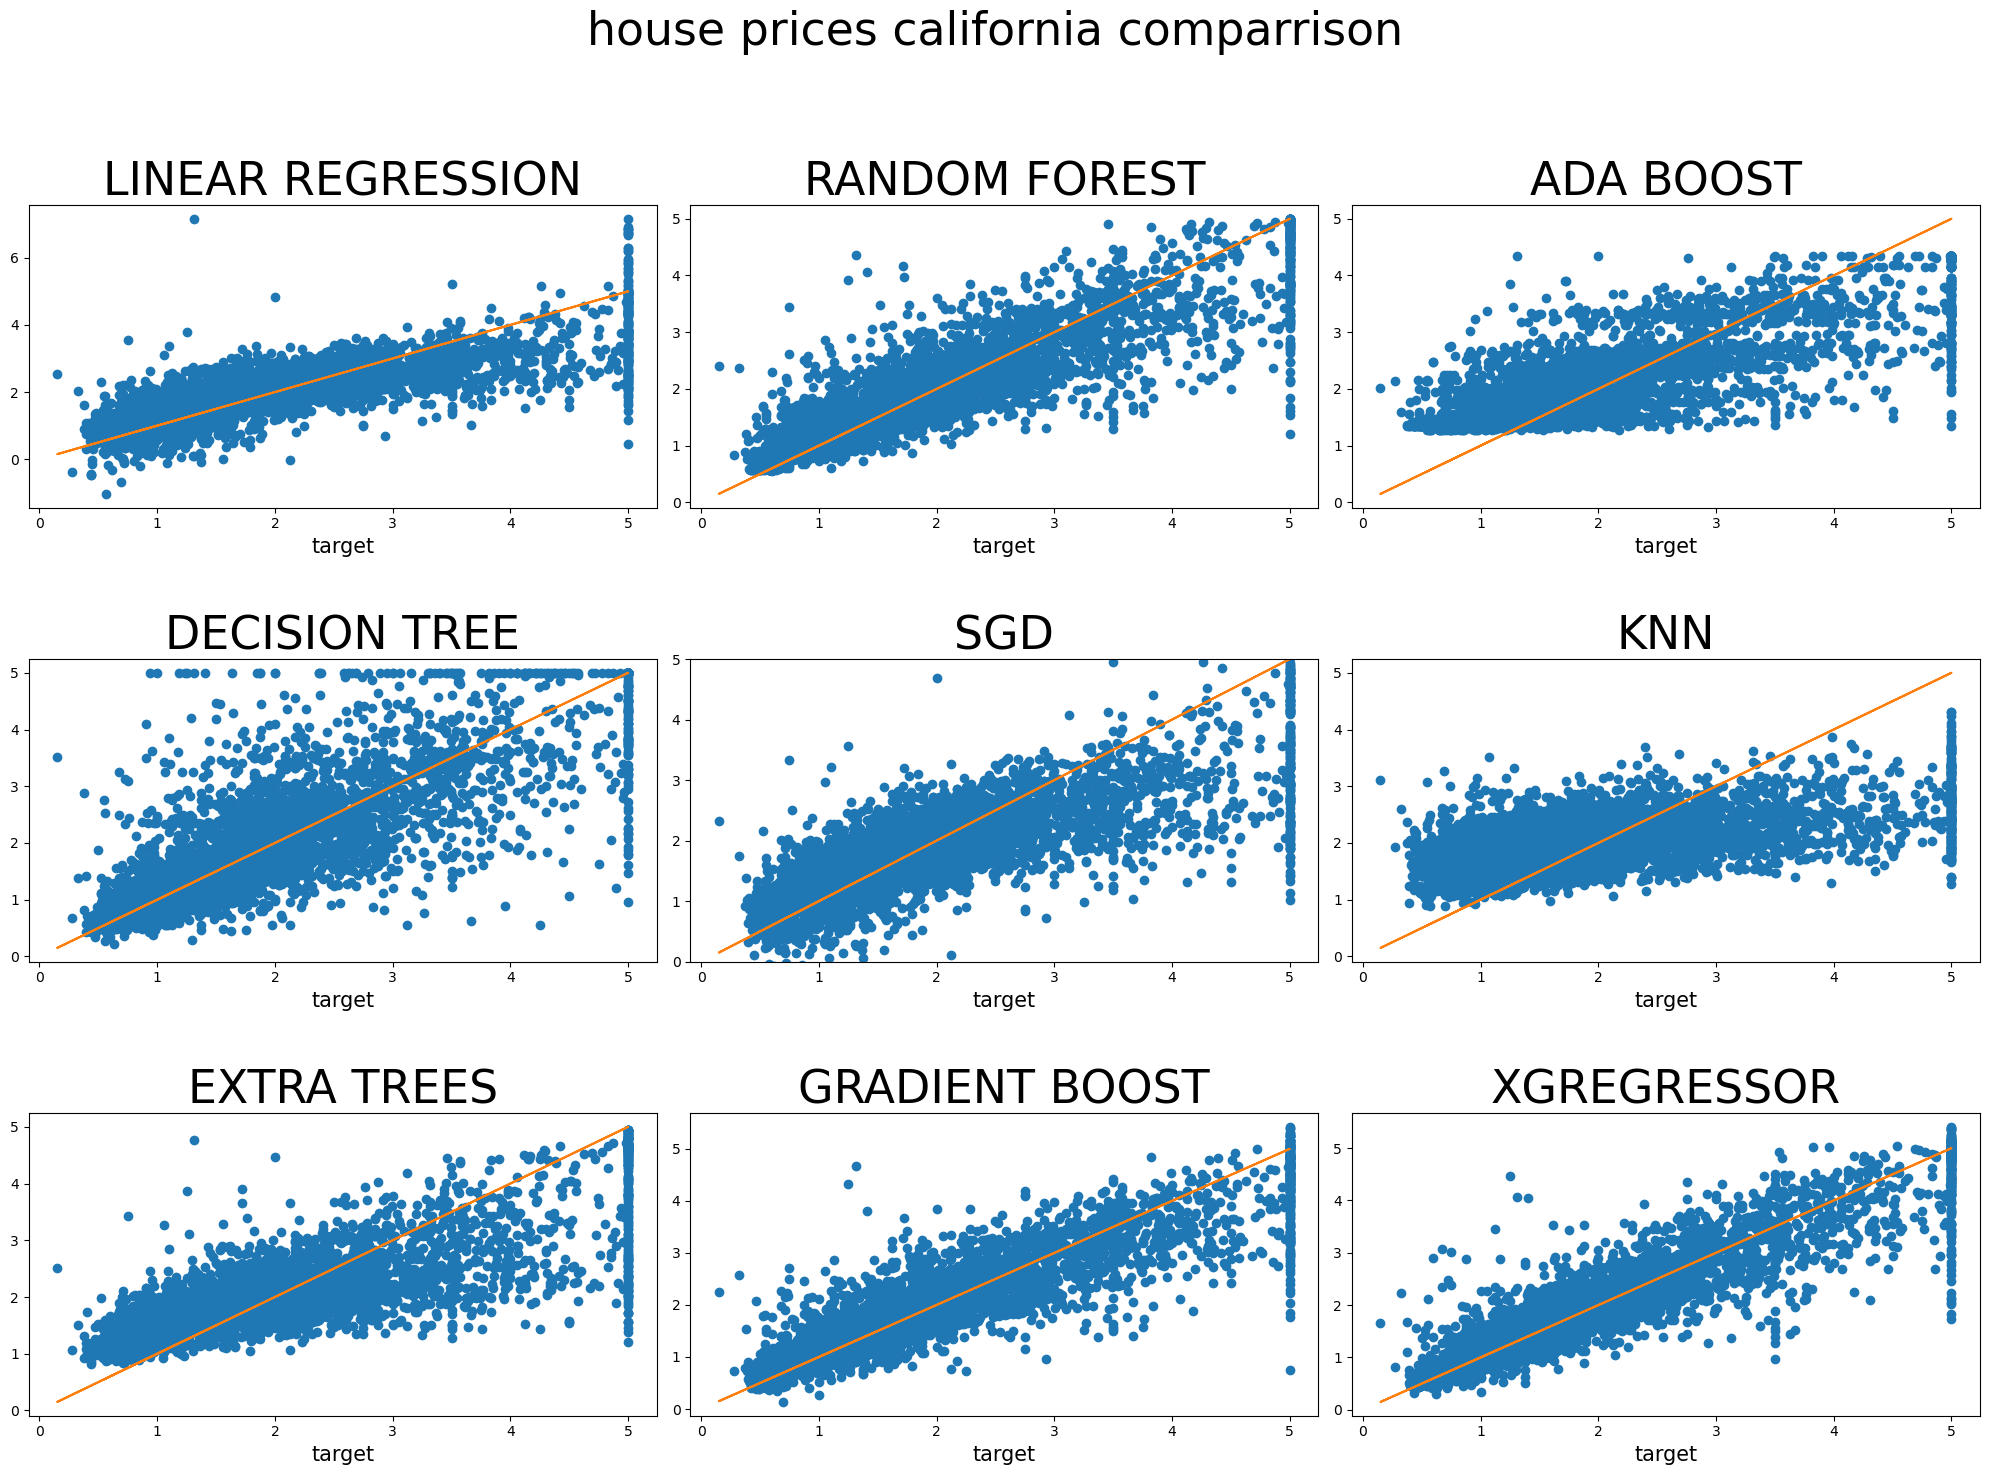

In [36]:
auxdic=scores
auxdic=list(auxdic.items())

fig,ax =plt.subplots(3,3) 
fig.suptitle("house prices california comparrison",size=33)   
fig.set_figwidth(20)
fig.set_figheight(15)
dimX=ax.shape[0] 
dimY=ax.shape[1] 
predictionsList= []
for i in predictions.keys():
    predictionsList.append(predictions[i]) 
predictionsList=np.transpose(predictionsList) 
predictionsList=pd.DataFrame(predictionsList,columns=models.keys())  

#print(predictions)
#predictions=np.transpose(pd.DataFrame(predictions)) 
m_keys=list(models.keys()) 
print(m_keys) 
print(len(m_keys))
for i in range(dimX): 
    for j in range(dimY) : 
        oneDIndex=(i*dimX)+j  
        ax[i,j].plot(y_test,predictions[m_keys[oneDIndex]],"o")  
        ax[i,j].set_title(m_keys[oneDIndex],size=33) 
        ax[i,j].set_xlabel("target",size=15) 
        ax[i,j].set_xbound(lower=0,upper=10)
        if m_keys[oneDIndex] == 'SGD': 
            ax[i,j].set_ybound(lower=0,upper=12) 
            ax[i,j].set_ylim(0,5) 
        m,b=np.polyfit(y_test,y_test,deg=1)
        ax[i,j].plot(y_test,m*y_test+b)
        # centerish=ax[i,j].get_xbound()[1]/2
        # centerishY=ax[i,j].get_ybound()[1]/2
        # ax[i,j].text(x=centerish-13,y=-centerishY/2.5,s=("R2:%f" % float(auxdic[oneDIndex][1])),ma="center")
fig.align_labels() 
fig.tight_layout()
fig.subplots_adjust(top=0.85,hspace=0.5) 
plt.savefig('./images/model-comparrison.png')

In [37]:
# residuals = y_test - y_pred
# plt.hist(residuals, bins=50)
# plt.xlabel("Residuals")
# plt.ylabel("Frequency")
# plt.title("Distribution of Residuals in Regression")
# plt.show()

In [38]:
# plt.plot(y_test, label='True Values')
# plt.plot(y_pred, label='Predictions')
# plt.xlabel("Sample Index")
# plt.ylabel("Values")
# plt.title("True Values vs Predictions Across Samples")
# plt.legend()
# plt.show()